In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('SOL-USD (3).csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...,...
720,2022-03-31,120.681557,128.930115,120.197830,122.661461,122.661461,4115229587
721,2022-04-01,122.736107,137.558411,118.787910,134.430939,134.430939,4434807484
722,2022-04-02,134.453583,143.020020,132.139191,132.198868,132.198868,3394186456
723,2022-04-03,132.241074,140.263702,131.226151,136.775330,136.775330,2585967812


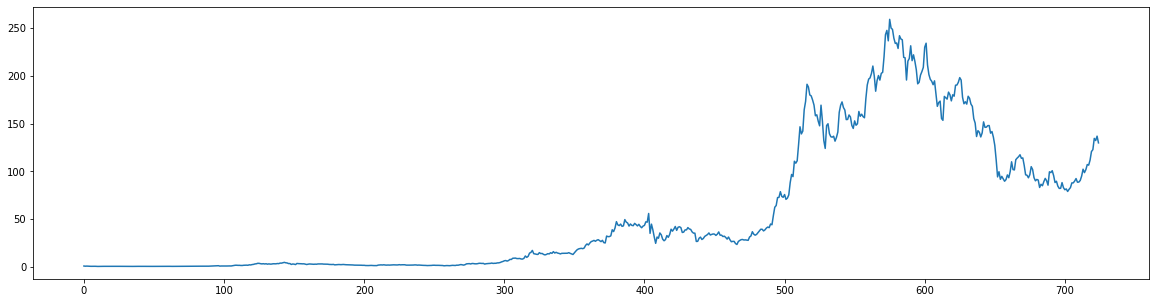

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data['Close'])


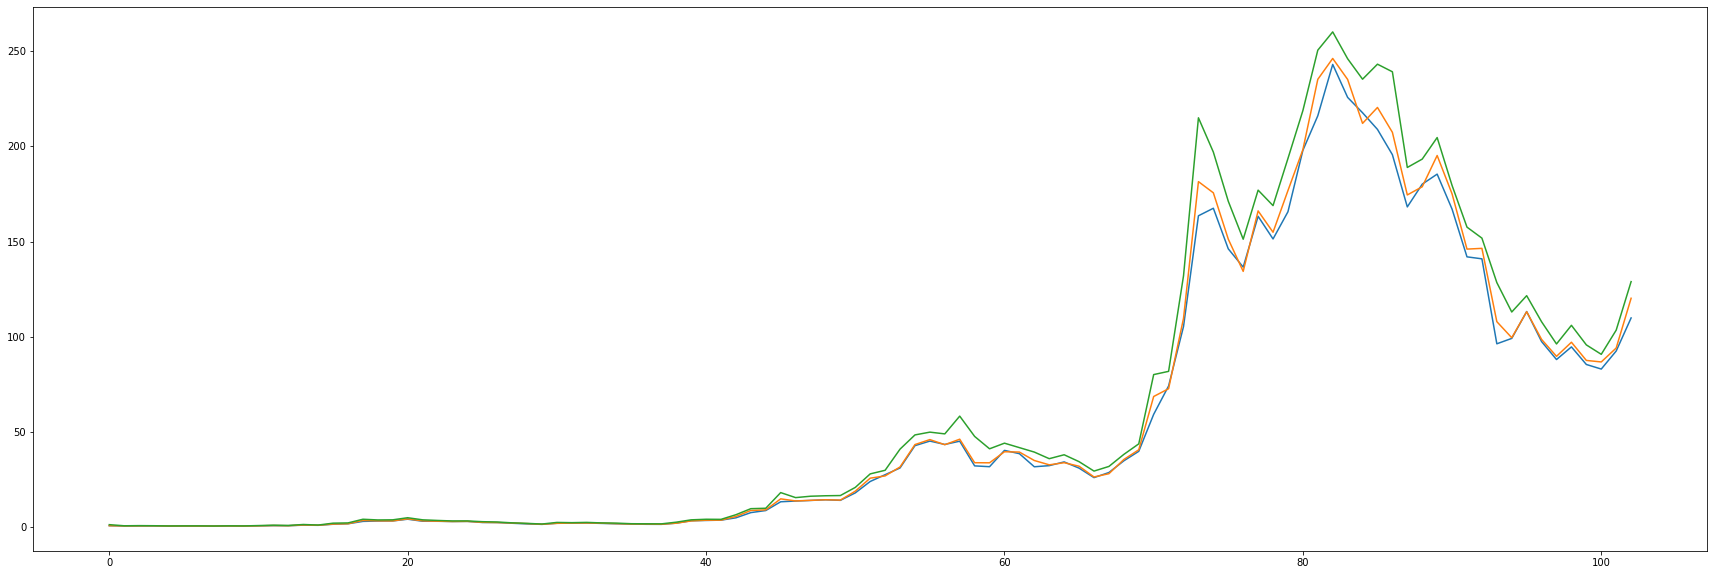

In [ ]:
dataWeek= pd.DataFrame(columns = ['Date', 'high', 'low','average','difference'])
wkCount = 0
goto = False
for date,high,low,close in zip(data['Date'],data['High'],data['Low'],data['Close']):
  if wkCount==0:
    wkhigh = high
    wkLow = low
    wkAvg = 0
    wkDate = str(date)+' to '
    goto = False
  if high>wkhigh:
    wkhigh=high
  if wkLow<low:
    wkLow = low
  wkAvg =  wkAvg + close  
  if wkCount==6:
    wkDate+=str(date)  
    Ave = wkAvg/7
    diff = wkhigh - wkLow
    dataWeek = dataWeek.append({'Date' : wkDate ,'high':wkhigh,'low':wkLow,'average':Ave,'difference':diff}, 
                ignore_index = True)
    wkCount=0
    wkDate = ''
    goto= True

  if goto==False:  
    wkCount+=1
plt.figure(figsize=(30,10))
plt.plot(dataWeek['average'])
plt.plot(dataWeek['low'])
plt.plot(dataWeek['high'])


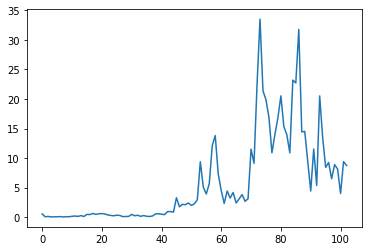

In [ ]:
plt.plot(dataWeek['difference'])

In [ ]:
dataWeek['difference'][70:]

70     11.509407
71      9.116844
72     22.309266
73     33.511307
74     21.379776
75     19.891799
76     16.888641
77     10.900330
78     13.976578
79     16.833603
80     20.529450
81     15.315460
82     13.939682
83     10.876999
84     23.200821
85     22.724487
86     31.792328
87     14.427734
88     14.521027
89      9.417771
90      4.420044
91     11.533692
92      5.370560
93     20.523864
94     13.502266
95      8.413566
96      9.265014
97      6.495712
98      8.878975
99      8.153687
100     4.006058
101     9.390289
102     8.732285
Name: difference, dtype: float64

In [ ]:
sum(dataWeek['difference'][70:])//32

14.0

In [ ]:
p = 14*175*1

In [ ]:
p

2450

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima.arima import auto_arima

sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataSol = pd.read_csv('SOL-USD (3).csv')
dataSol.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


In [ ]:
dataSol['Date'] = pd.to_datetime(dataSol['Date'])
dataSol.set_index('Date', inplace=True)
dataSol.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


In [ ]:

dataSolWeekly = dataSol.Close.resample('W').mean()
dataSolWeekly.head()

Date
2020-04-12    0.870127
2020-04-19    0.675145
2020-04-26    0.622658
2020-05-03    0.684965
2020-05-10    0.613053
Freq: W-SUN, Name: Close, dtype: float64

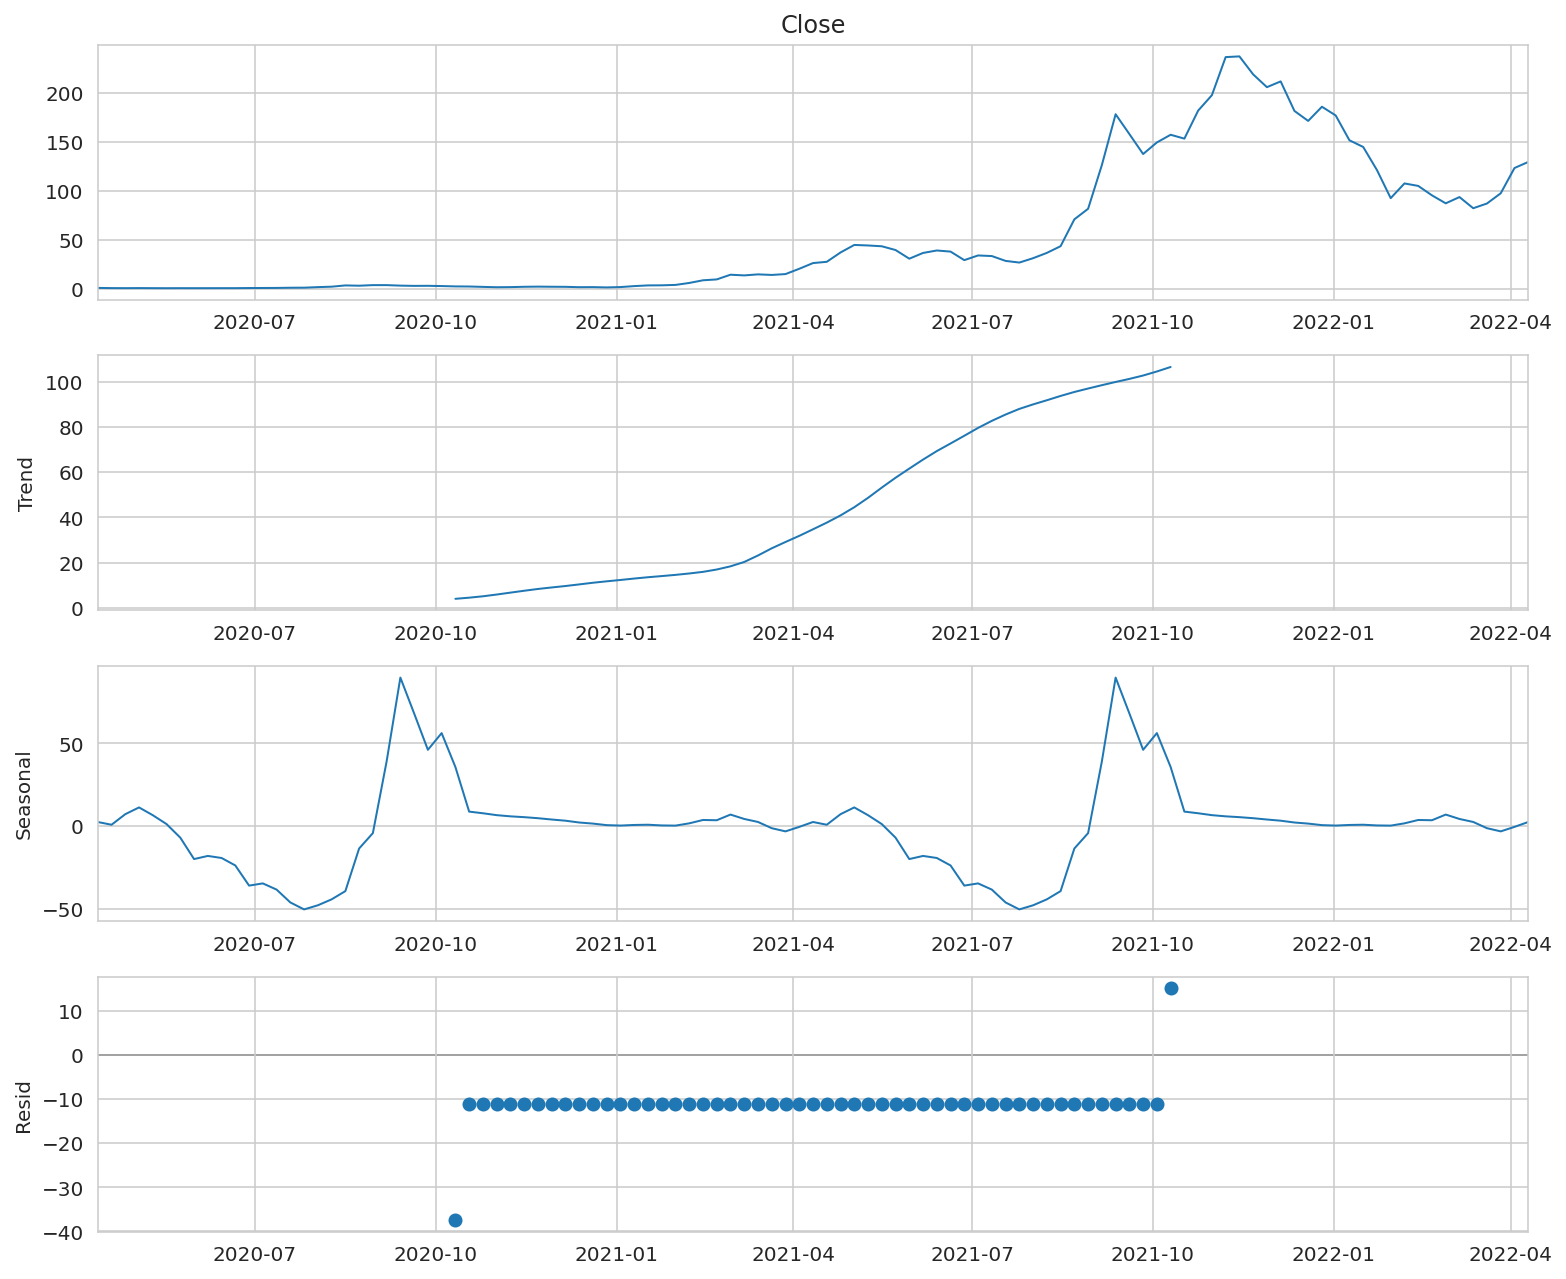

In [ ]:
# Additive decomposition for non-log values. 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
rcParams['lines.linewidth'] = 1.0

series = dataSolWeekly
decomposition = seasonal_decompose(series, model='additive')
fig = decomposition.plot()
plt.show()

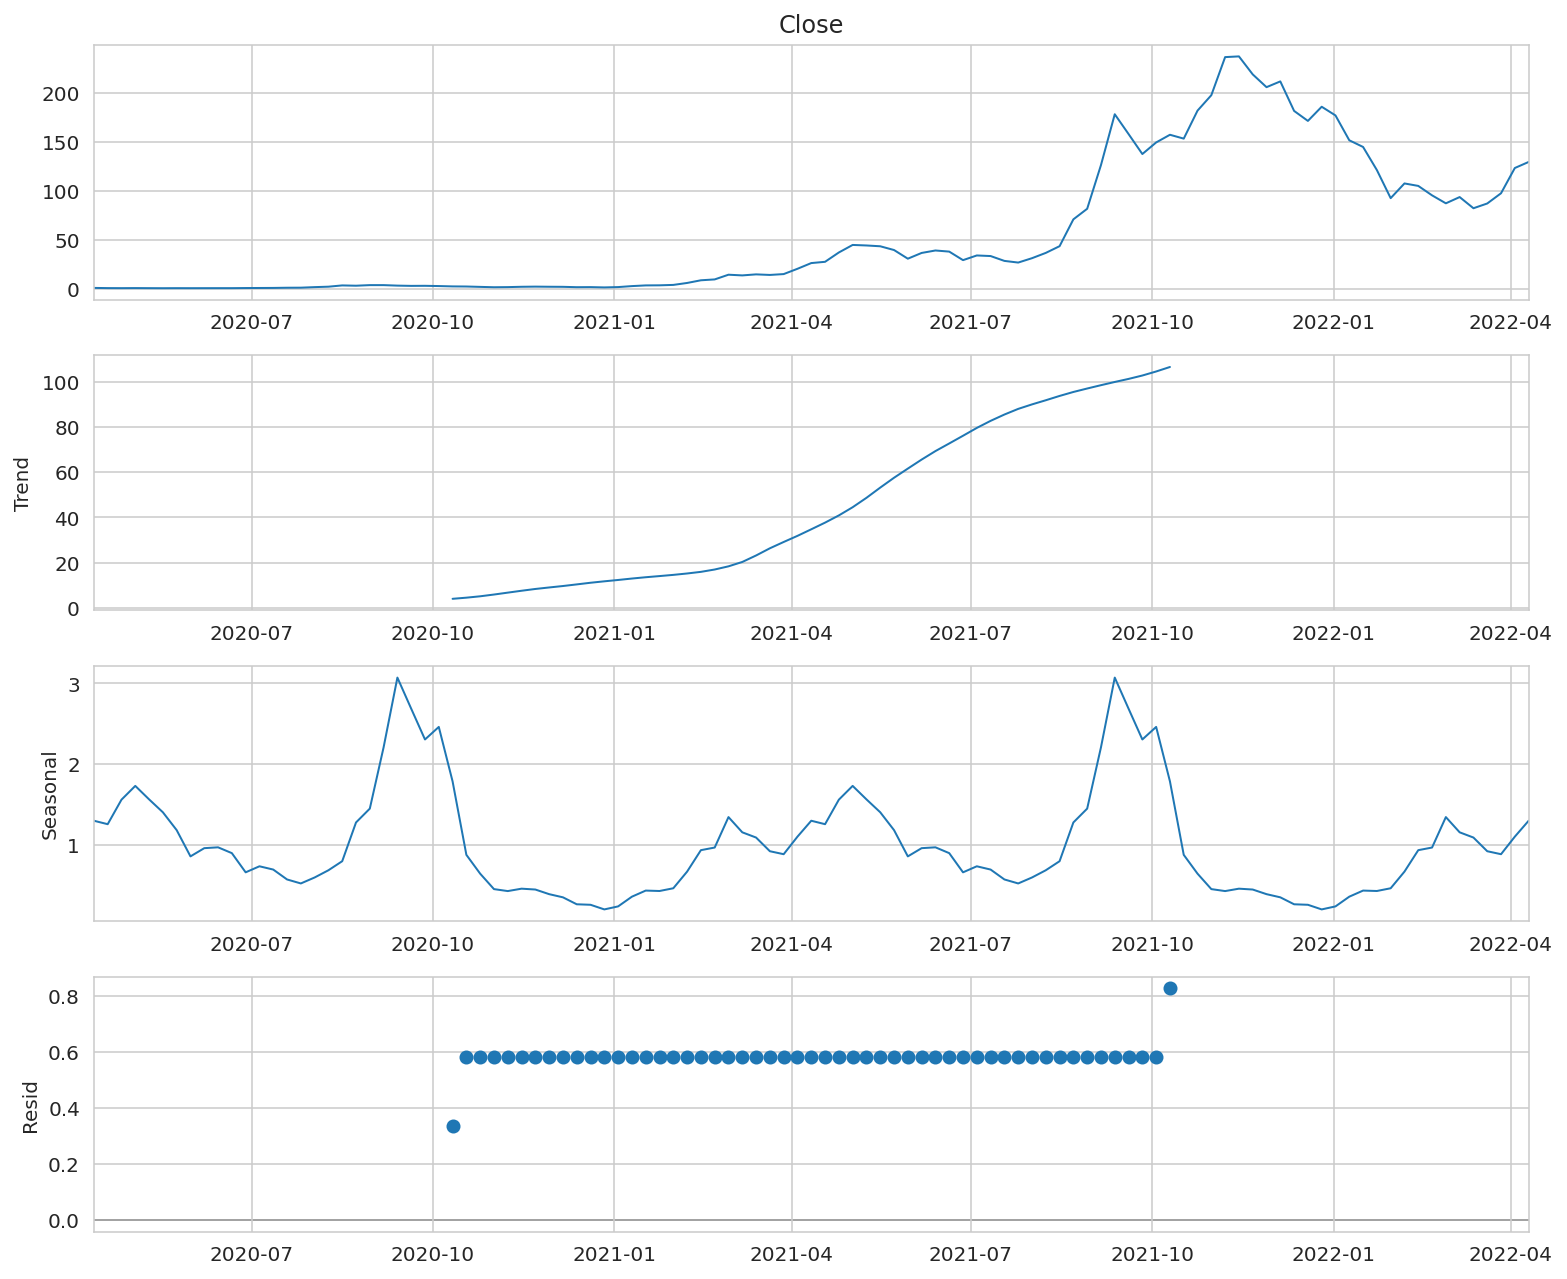

In [ ]:
# Multiplicative decomposition for non-log values. 
series = dataSolWeekly
decomposition = seasonal_decompose(series, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
# Testing for Stationarity
# p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

# Define a Dickey-Fuller test.

def test_stationarity(timeseries):

    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    # Plotting rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing a Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

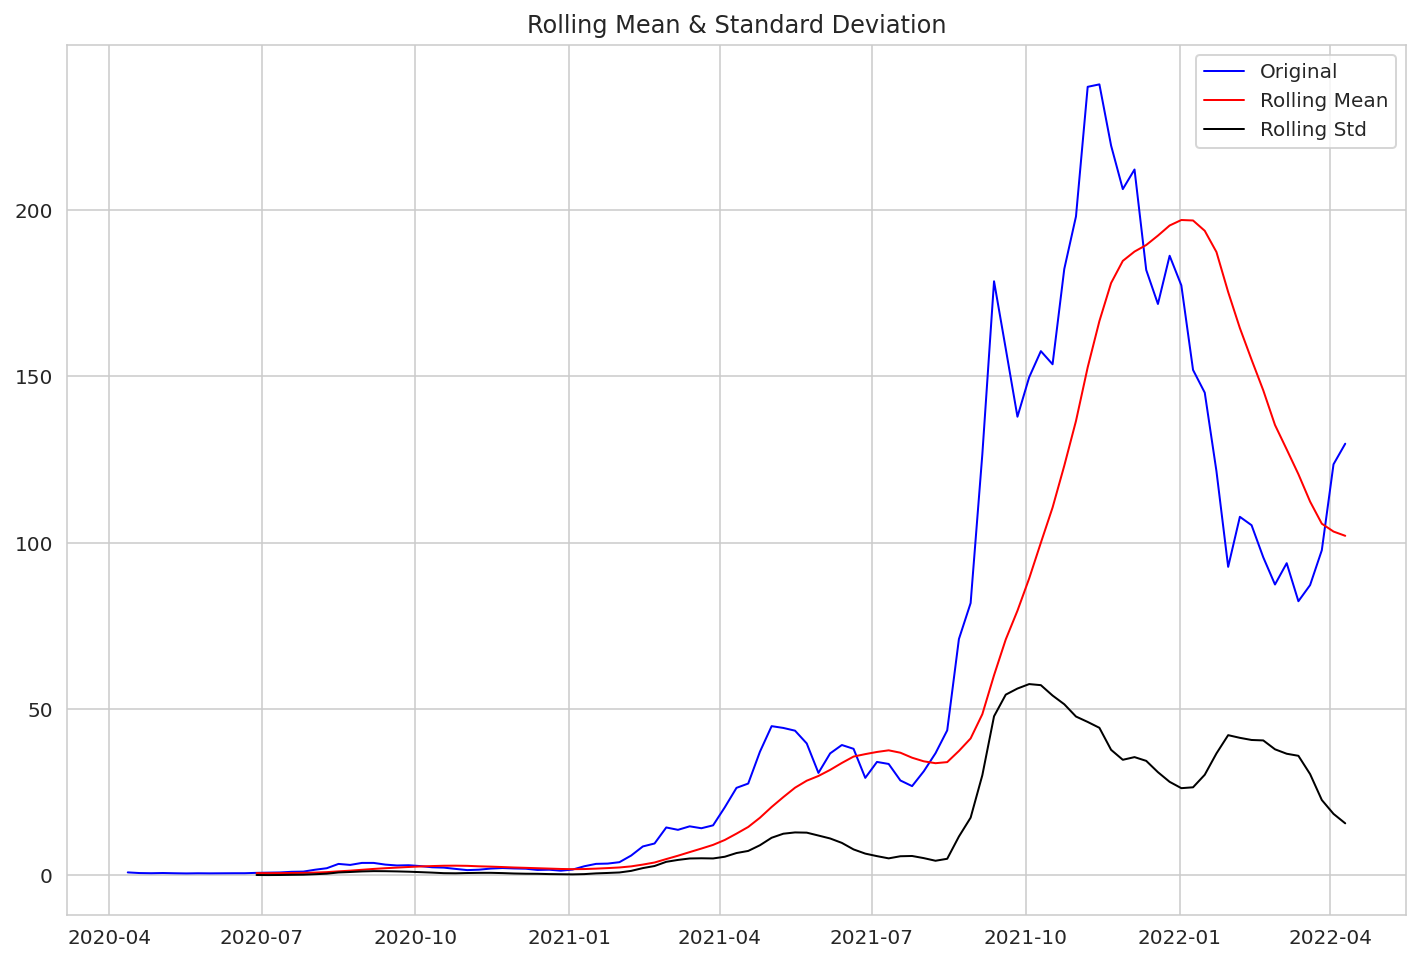

Results of Dickey-Fuller Test:
Test Statistic                 -1.195137
p-value                         0.675684
#Lags Used                     10.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [ ]:
test_stationarity(dataSolWeekly)

p > 0.05 , so we do a first differencing and test for stationarity again.


In [ ]:
series_diff = dataSolWeekly.diff()

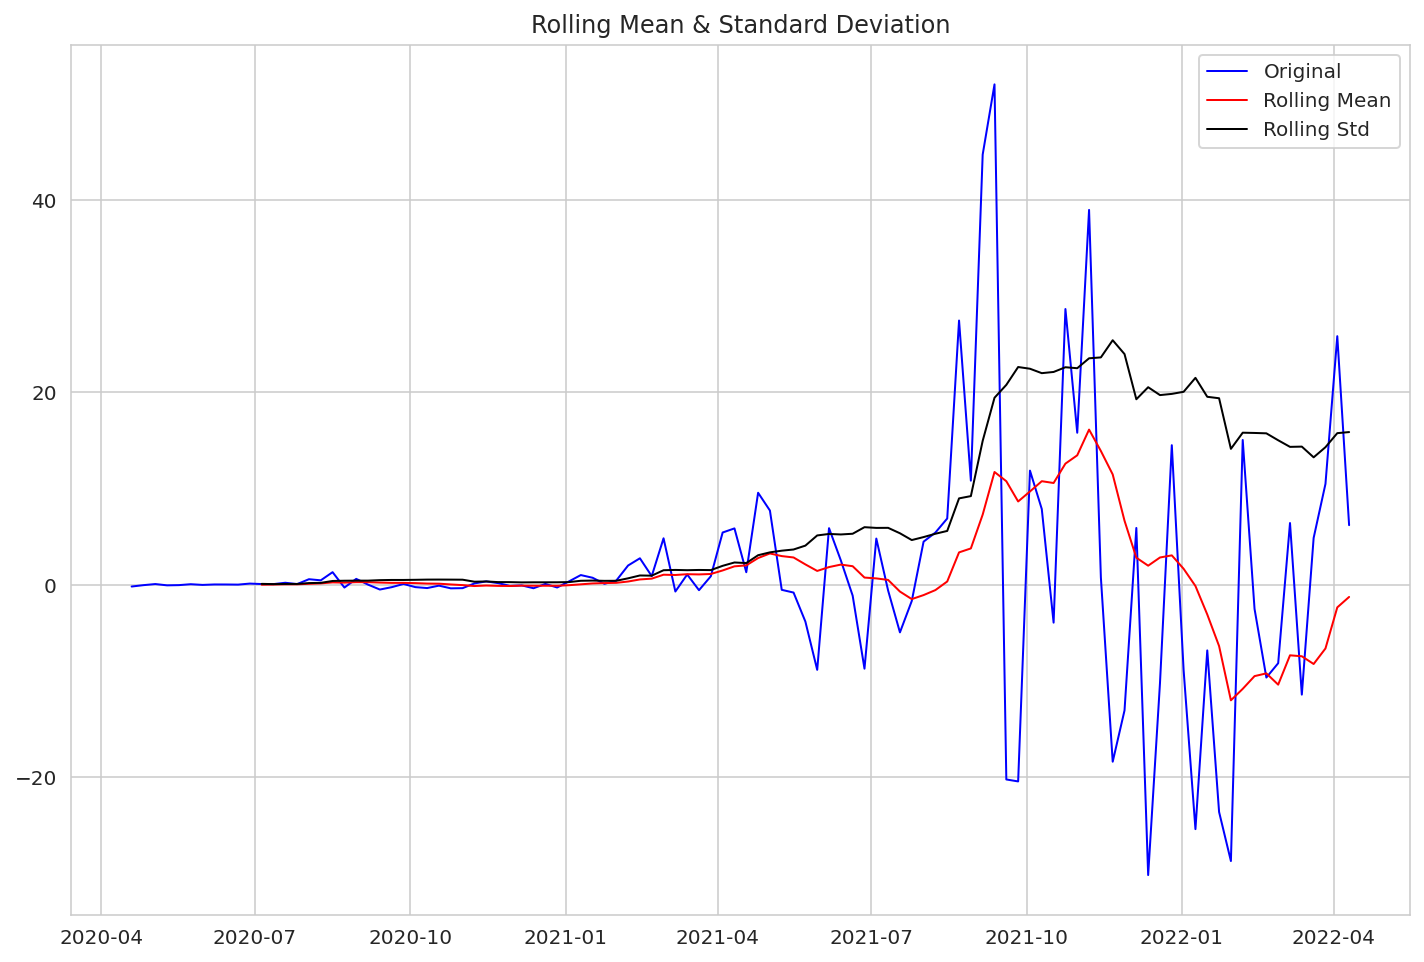

Results of Dickey-Fuller Test:
Test Statistic                 -3.262480
p-value                         0.016641
#Lags Used                     11.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


In [ ]:
series_diff.dropna(inplace=True)
test_stationarity(series_diff)

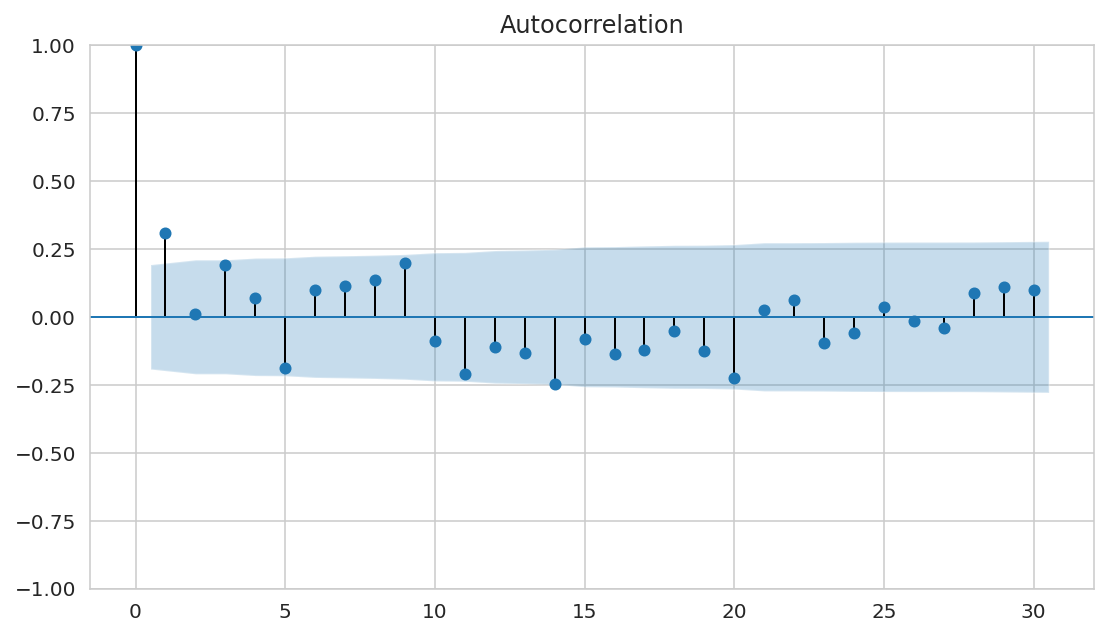

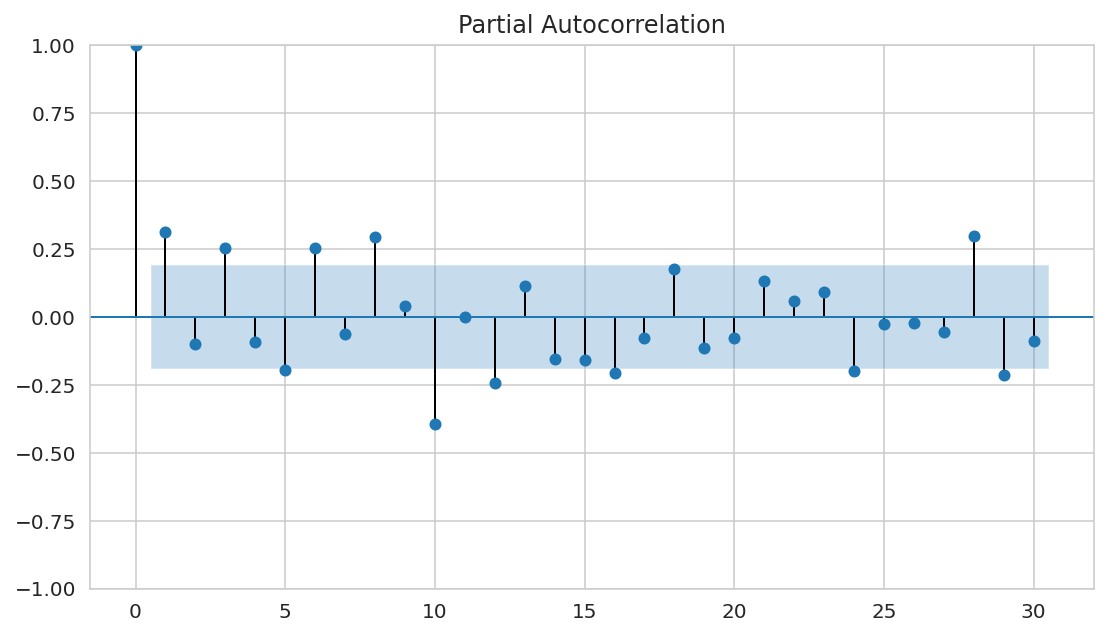

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(series_diff, lags=30, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(series_diff, lags=30, ax=ax)
plt.show()

In [ ]:
import statsmodels.api as sm
ar1ma1 = sm.tsa.arima.ARIMA(series_diff, order=(1,0,1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  104
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -399.317
Date:                Mon, 04 Apr 2022   AIC                            806.633
Time:                        16:54:01   BIC                            817.211
Sample:                    04-19-2020   HQIC                           810.919
                         - 04-10-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2171      1.673      0.728      0.467      -2.061       4.496
ar.L1         -0.1068      0.144     -0.742      0.458      -0.389       0.175
ma.L1          0.4772      0.132      3.617      0.000       0.219       0.736
sigma2       126.4376     10.390     12.169      0.000     106.073     146.802
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                98.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             381.03   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

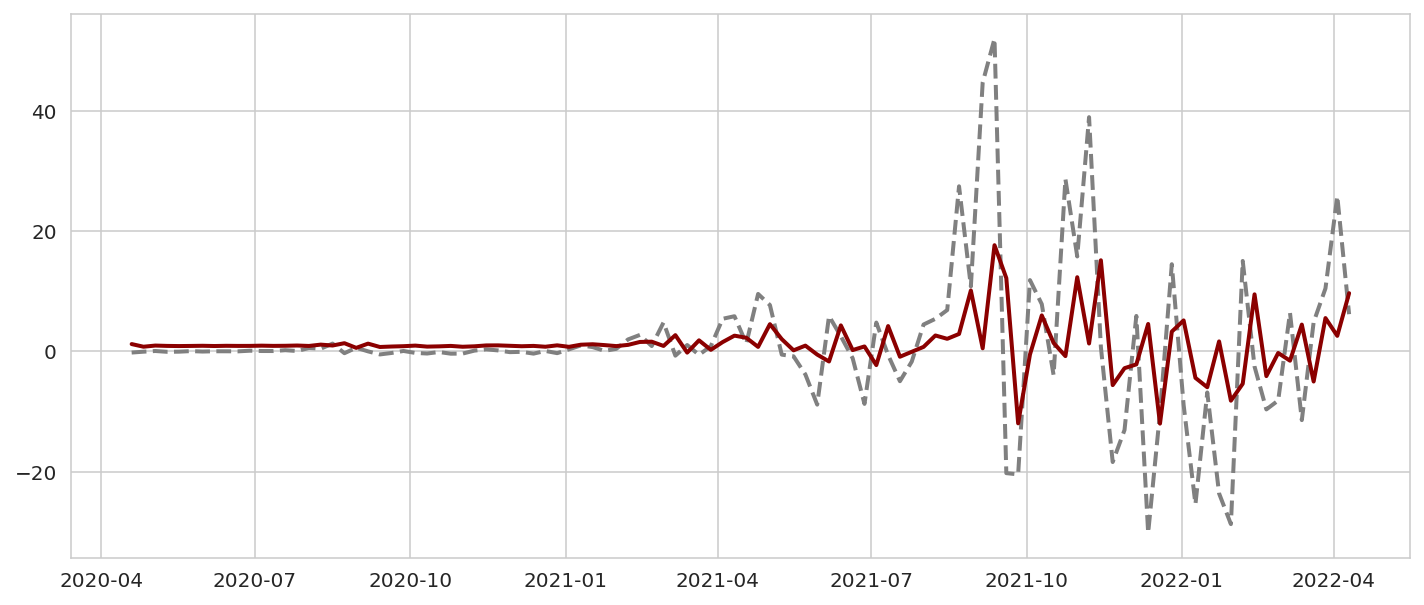

No handles with labels found to put in legend.


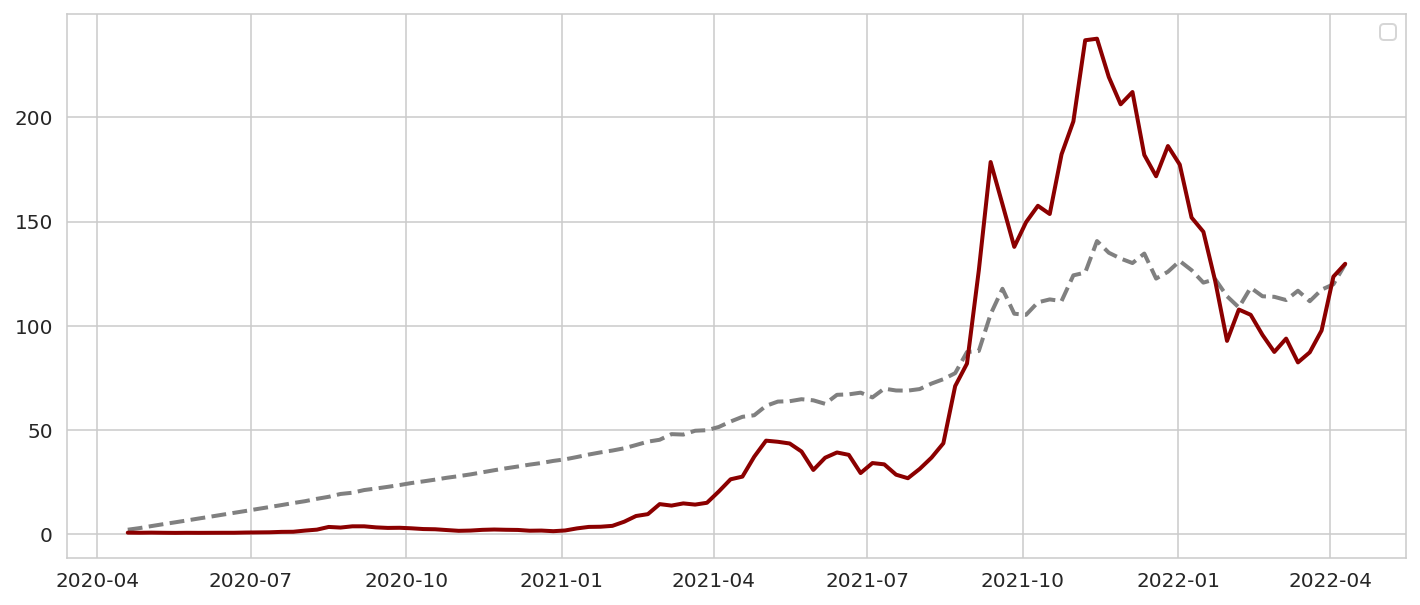

In [ ]:
predictions = ar1ma1.predict()
full_pred = dataSolWeekly.values[0]+np.cumsum(ar1ma1.fittedvalues)

date_ticks = dataSolWeekly.index


fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], series_diff, lw=2, color='grey', ls='dashed',label='Data')
ax.plot(date_ticks[1:], predictions, lw=2, color='darkred',label='Fit')
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], dataSolWeekly[1:], lw=2, color='darkred')

plt.legend()
plt.show()

In [ ]:
r2_score(series_diff, ar1ma1.fittedvalues)

0.12364607188953092

In [ ]:
#outof sample prediction 
len(dataSolWeekly)

105

In [ ]:
series_diff.tail()

Date
2022-03-13   -11.433983
2022-03-20     4.857583
2022-03-27    10.477016
2022-04-03    25.834085
2022-04-10     6.185534
Freq: W-SUN, Name: Close, dtype: float64

No handles with labels found to put in legend.


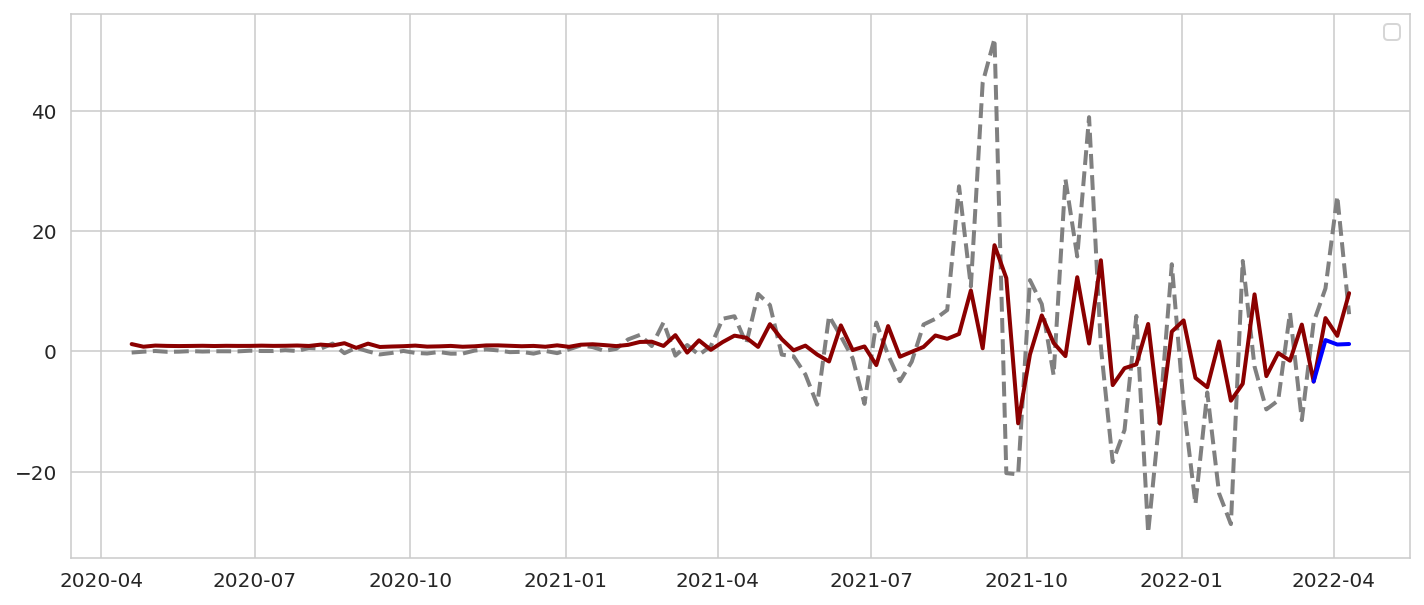

In [ ]:
predictions_oos = ar1ma1.predict(start=100, dynamic=True)
#predictions_oos = ar1ma1.predict(start=pd.to_datetime('2018-08-19'), end='2018-12-19', dynamic=False)
#predictions_oos = ar1ma1.predict(start=158, end=200, dynamic=False)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], series_diff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], predictions, lw=2, color='darkred')
ax.plot(date_ticks[101:], predictions_oos, lw=2, color='blue')
plt.legend()
plt.show()

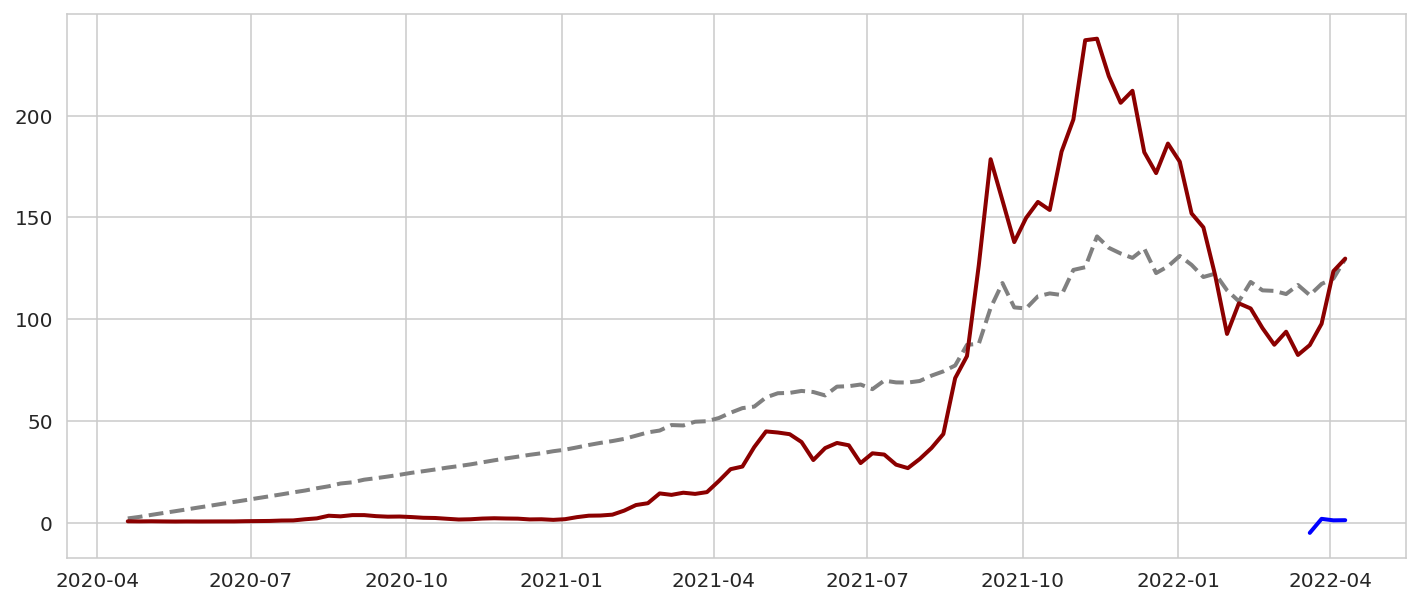

In [ ]:
#recunstructio the full prediction 
full_pred = dataSolWeekly.values[0]+np.cumsum(ar1ma1.fittedvalues)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], dataSolWeekly[1:], lw=2, color='darkred')
ax.plot(date_ticks[101:], predictions_oos, lw=2, color='blue')
plt.show()

In [ ]:
stepwise_model = auto_arima(series, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=797.057, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=764.392, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=779.253, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=754.099, Time=1.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=763.351, Time=1.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=755.463, Time=0.99 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=754.135, Time=0.99 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=752.141, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=761.698, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -372.071
Date:                             Mon, 04 Apr 2022   AIC                            752.141
Time:                                     17:03:10   BIC                            762.228
Sample:                                          0   HQIC                           756.212
                                             - 105                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4015      0.067      5.957      0.000       0.269       0.534
ar.S.L12      -0.7330      0.085     -8.661      0.000      -0.899      -0.567
ar.S.L24      -0.4506      0.117     -3.848      0.000      -0.680      -0.221
sigma2       172.6200     18.695      9.233      0.000     135.978     209.262
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):            1481.72   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(series, 
                                  order=(0,1,1), 
                                  seasonal_order=(1,1,[],12))
results = model.fit()

print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -377.849
Date:                             Mon, 04 Apr 2022   AIC                            761.698
Time:                                     17:05:09   BIC                            769.263
Sample:                                 04-12-2020   HQIC                           764.751
                                      - 04-10-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4320      0.068      6.386      0.000       0.299       0.565
ar.S.L12      -0.5209      

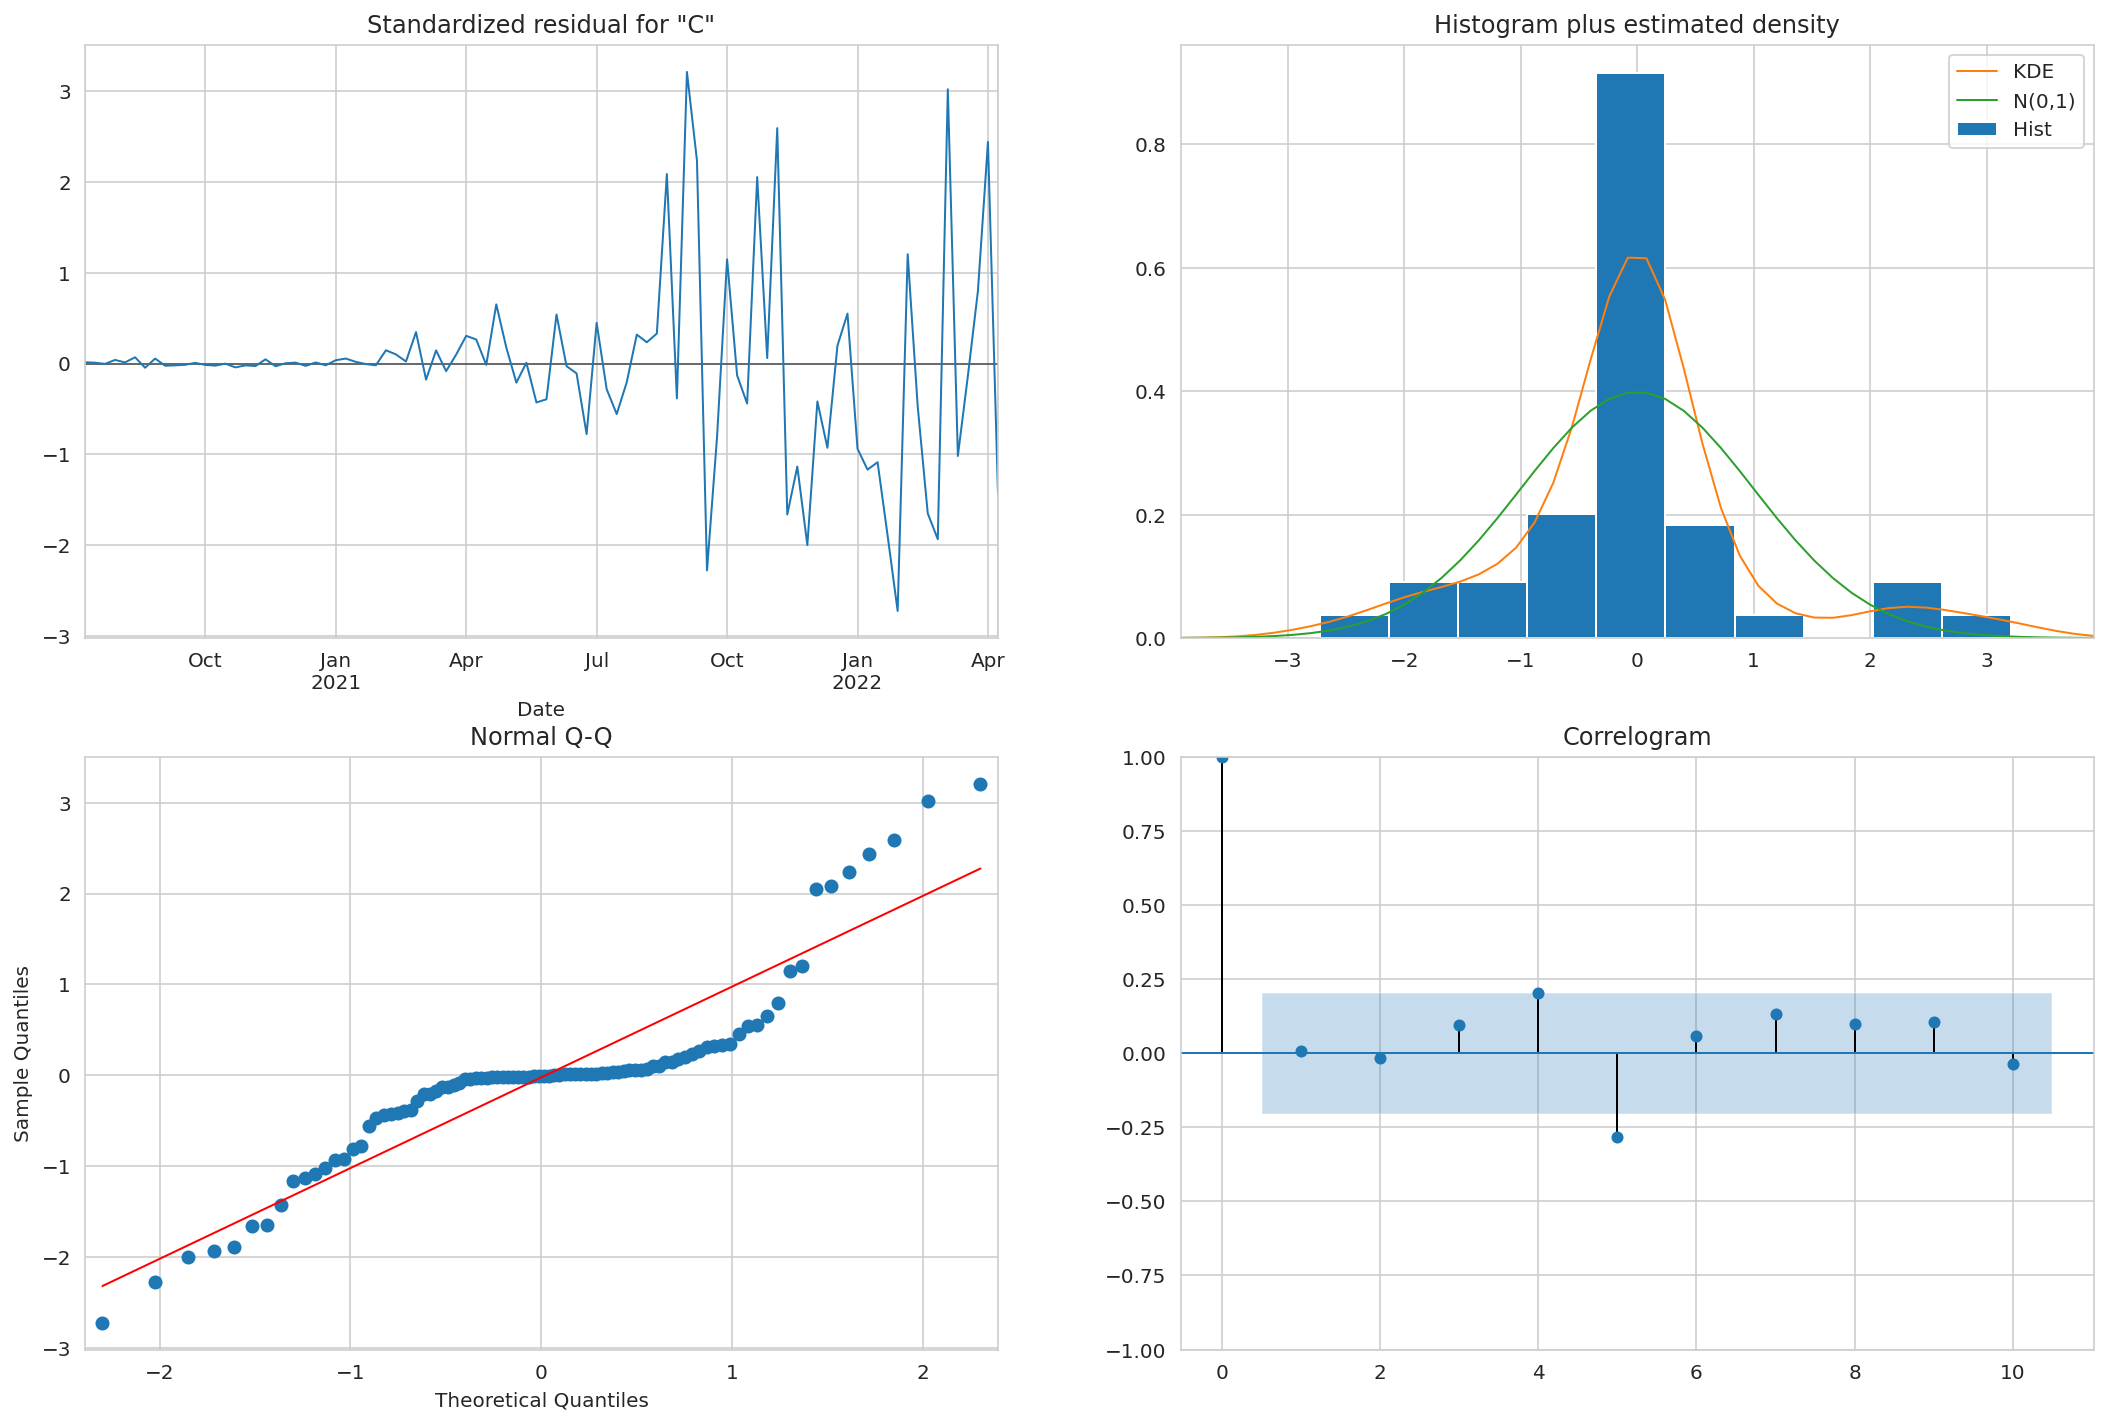

In [ ]:
results.plot_diagnostics(figsize=(18, 12))
plt.show()

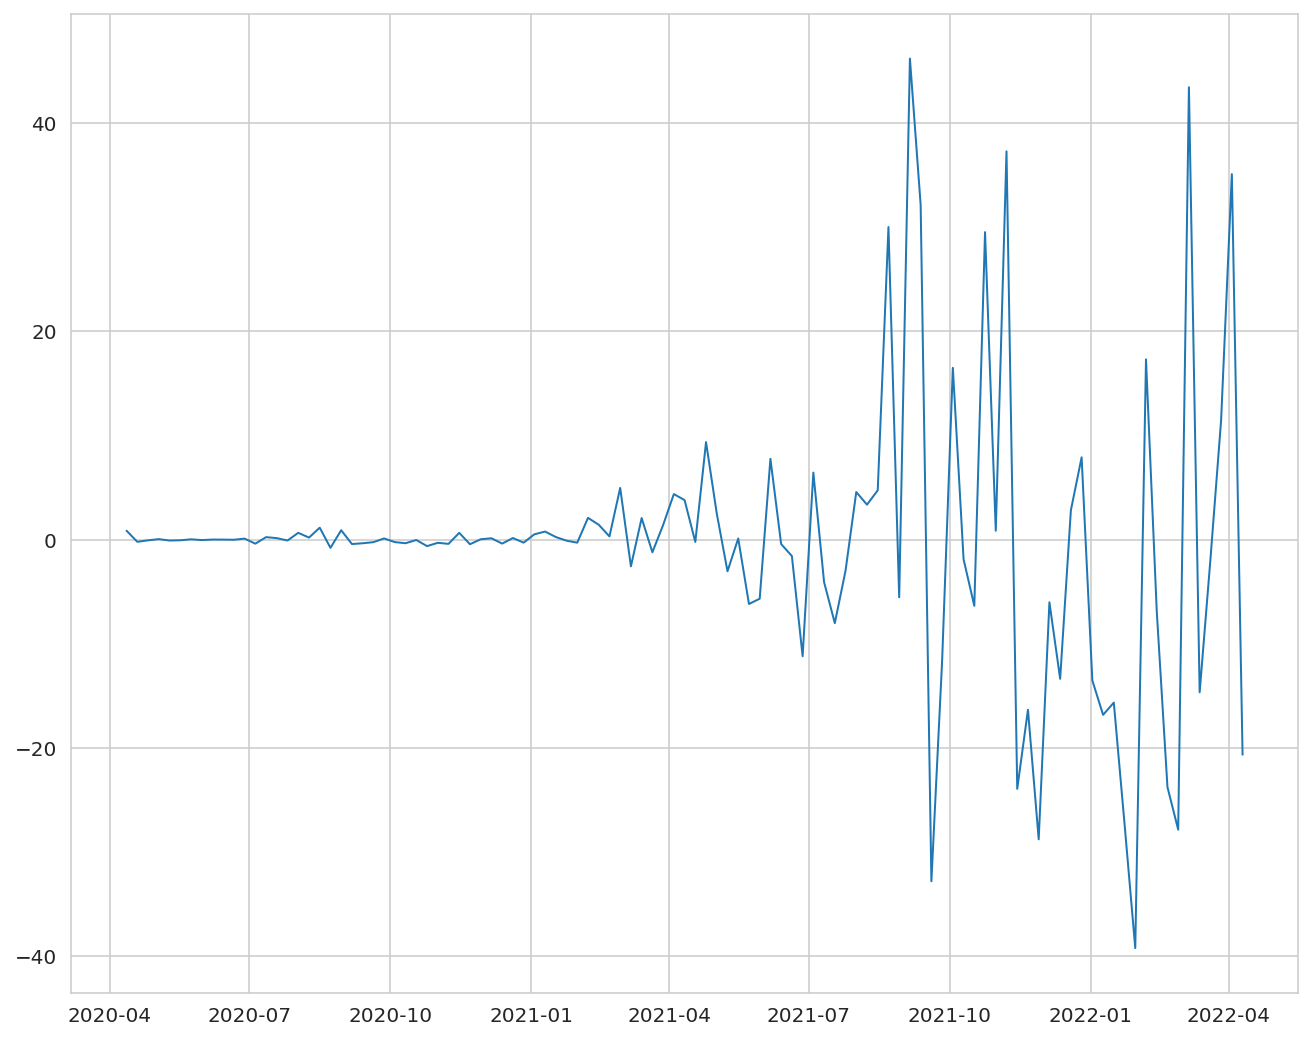

In [ ]:
residuals = results.resid
plt.plot(residuals)

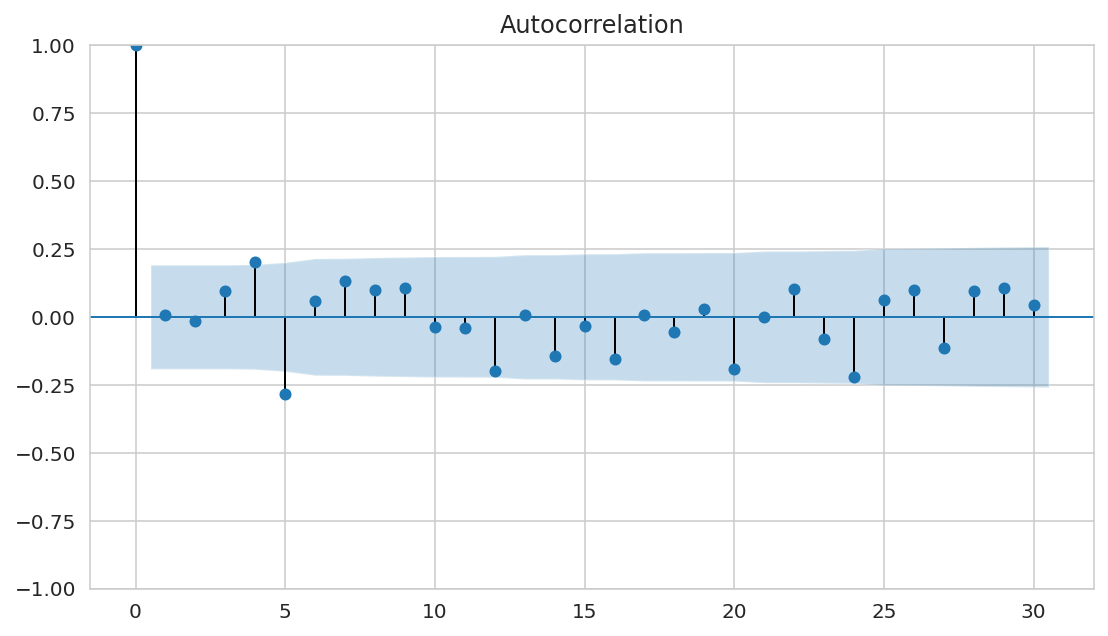

In [ ]:
# Plot the ACF and PACF of the residuals
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(residuals, lags=30, ax=ax)
plt.show()
# autocorrelation found , means when we decompose the original series some of the signal has remained in the residuals.
# if have time can tuned more to remove autocorr

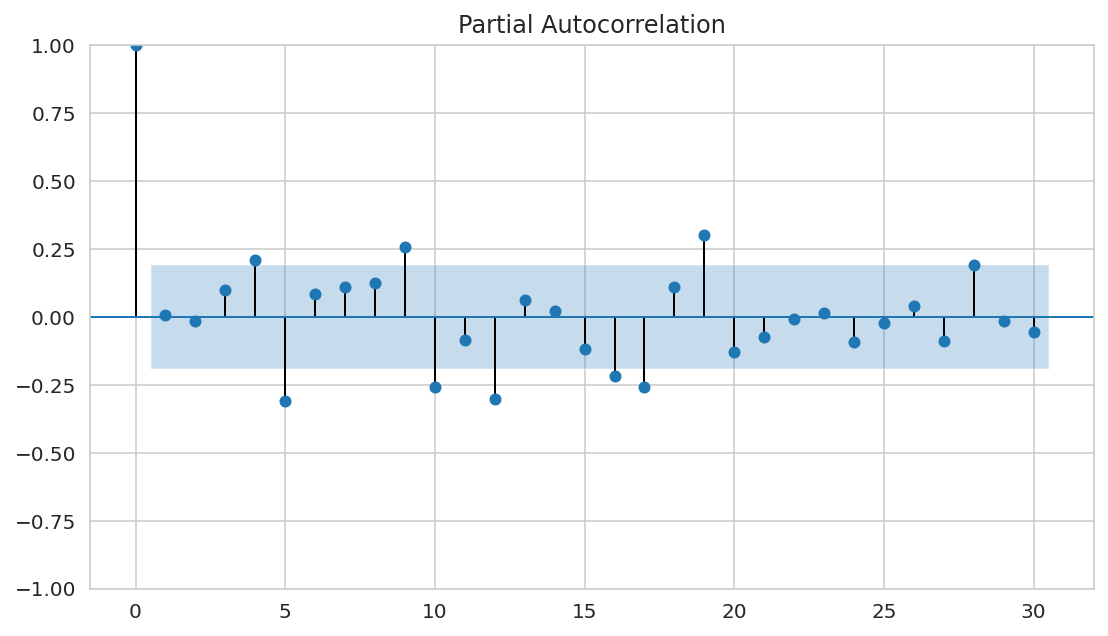

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(residuals, lags=30, ax=ax)
plt.show()
# each point against the first.

In [ ]:
pd.options.display.max_seq_items = 2000
series.index

DatetimeIndex(['2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
      

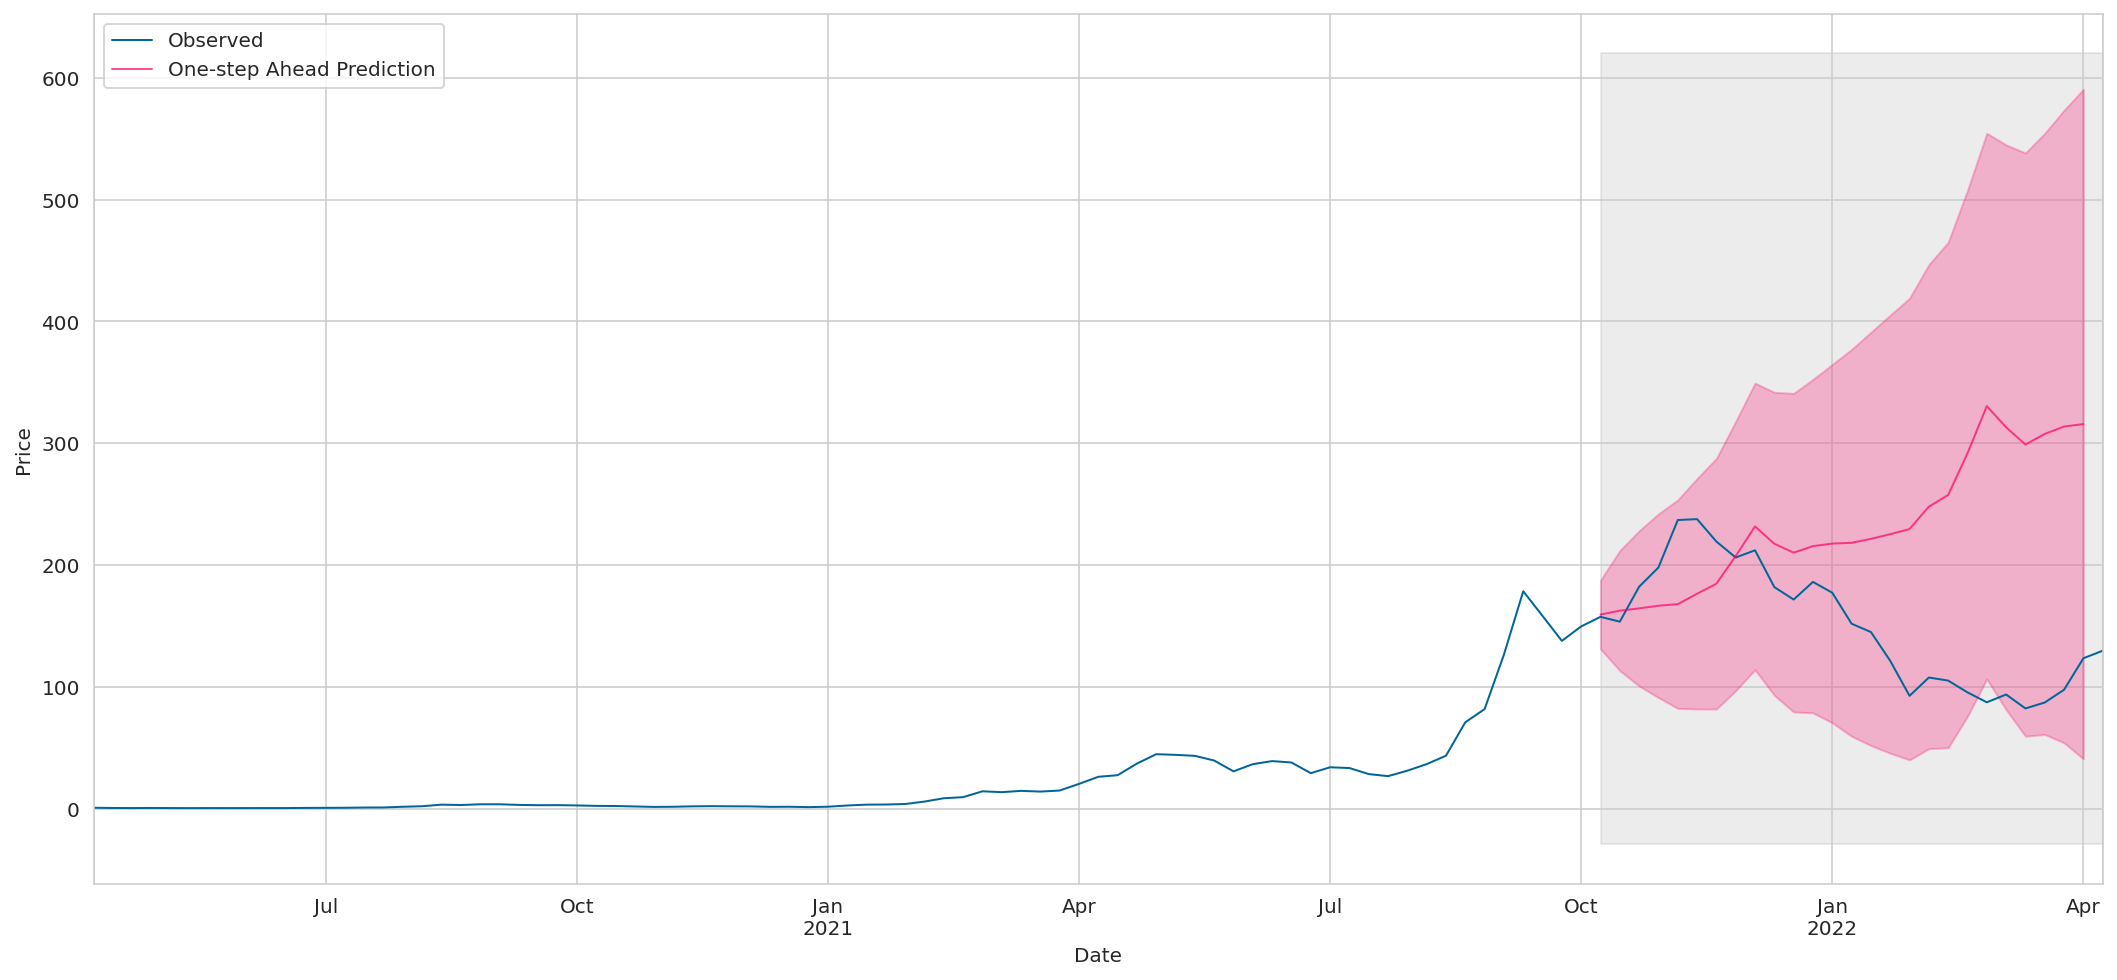

In [ ]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(series,
                                order=(0,1,1),
                                seasonal_order=(1,1,[],12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()
 
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2021-10-10'), 
                          end=pd.to_datetime('2022-04-03'),
                          dynamic=True, full_results=True)

pred_ci = pred.conf_int()

plt.figure(figsize=(18, 8))

# plot in-sample-prediction
ax = dataSolWeekly['2020-04-12':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-10-10'), dataSolWeekly.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
import math
y_hat = pred.predicted_mean
y_true = dataSolWeekly['2021-10-10':]
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 16318.51 MSE (127.74 RMSE)


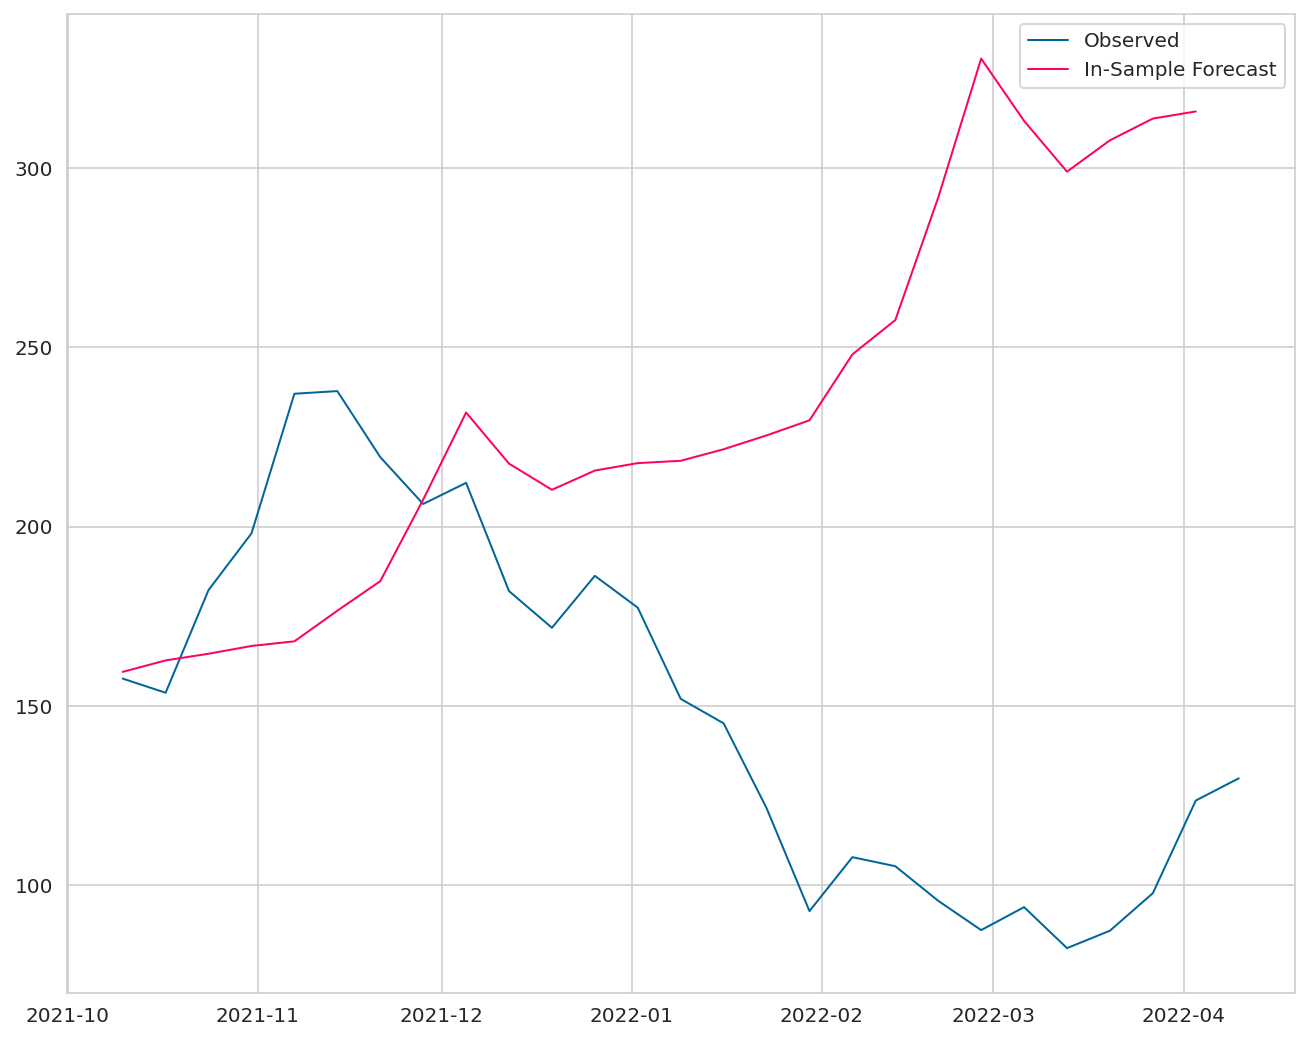

In [ ]:
plt.plot(y_true, label='Observed', color='#006699')
plt.plot(y_hat, label='In-Sample Forecast', color='#ff0066')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend(loc='upper right');
plt.show()

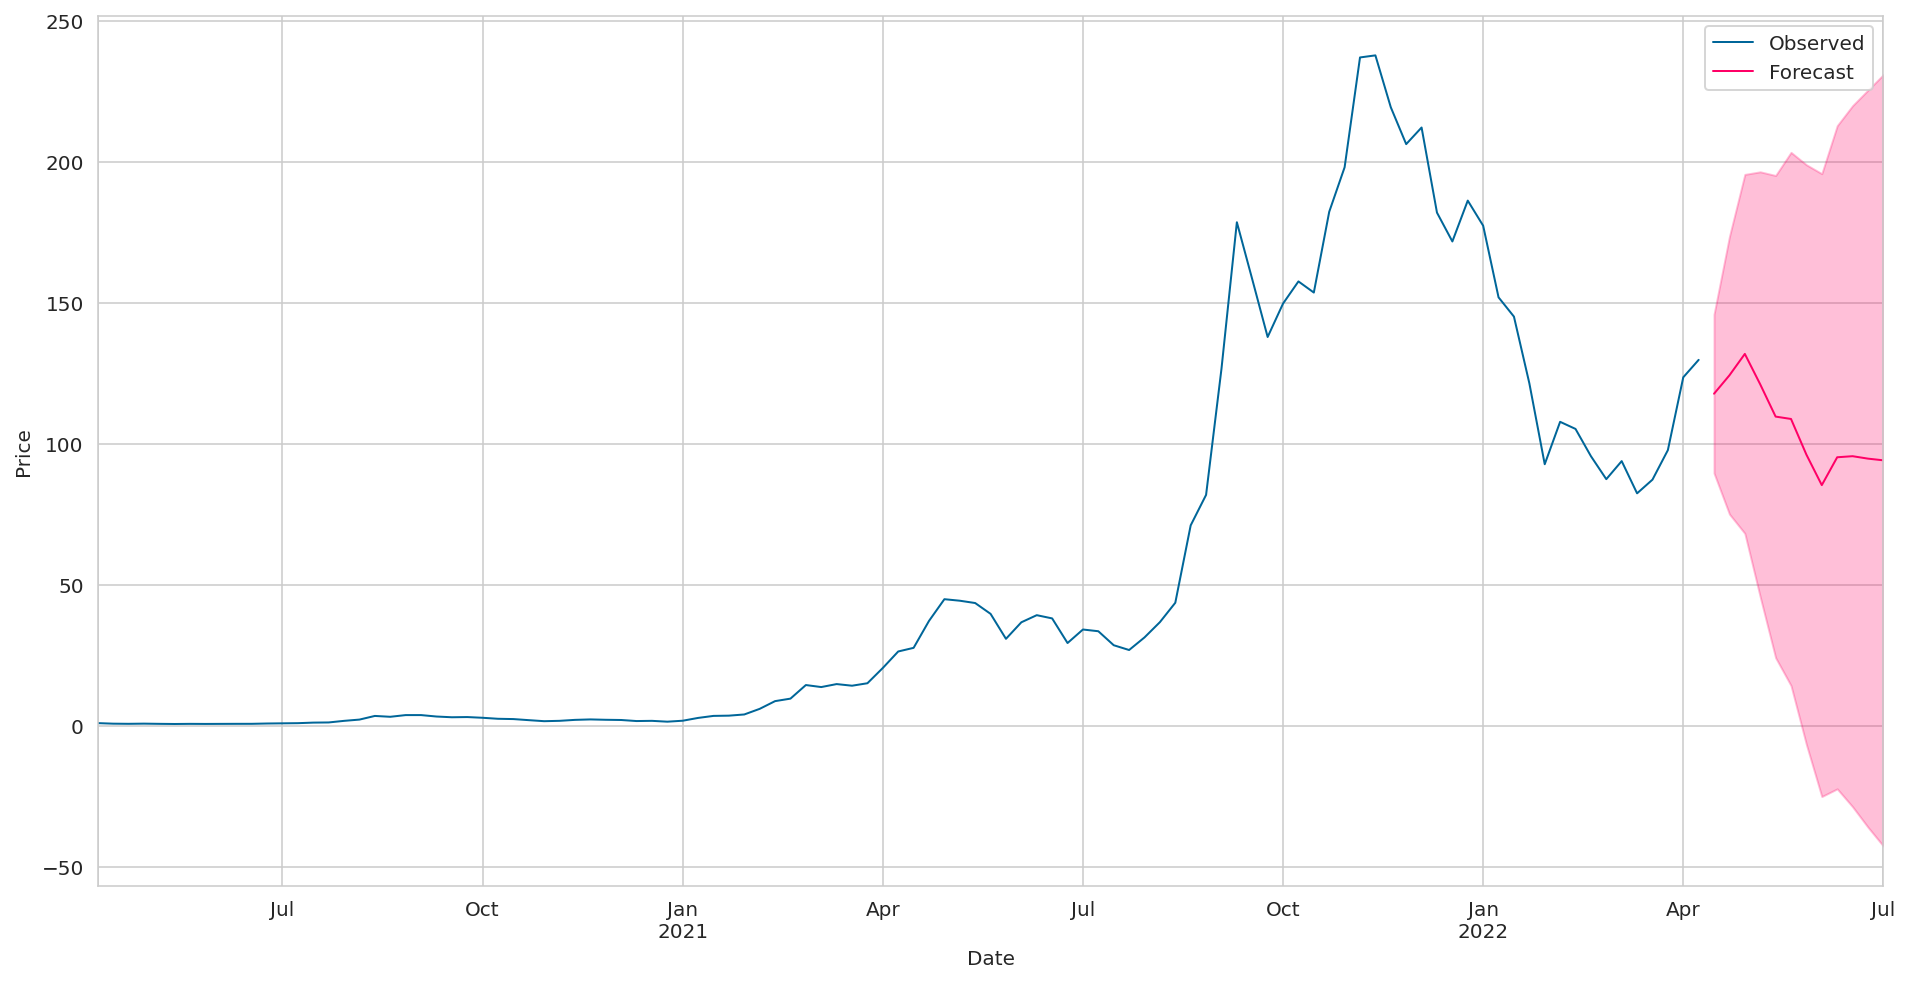

In [ ]:
# get forecast 12 steps ahead in future
pred_uc = res.get_forecast(steps=12)
 
# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
 
# plot time series and long-term forecast
ax = dataSolWeekly.plot(label='Observed', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Price');
plt.legend(loc='upper right')
plt.show()

In [ ]:
pred_uc.predicted_mean

2022-04-17    117.740475
2022-04-24    124.271211
2022-05-01    131.861284
2022-05-08    121.060892
2022-05-15    109.622310
2022-05-22    108.780664
2022-05-29     96.119934
2022-06-05     85.310524
2022-06-12     95.191776
2022-06-19     95.572203
2022-06-26     94.705462
2022-07-03     94.107265
Freq: W-SUN, Name: predicted_mean, dtype: float64